In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [55]:
n_features = x_train.shape[1]*x_train.shape[2]
n_classes = len(np.unique(y_train))
batch_size = 100
learning_rate = 0.01

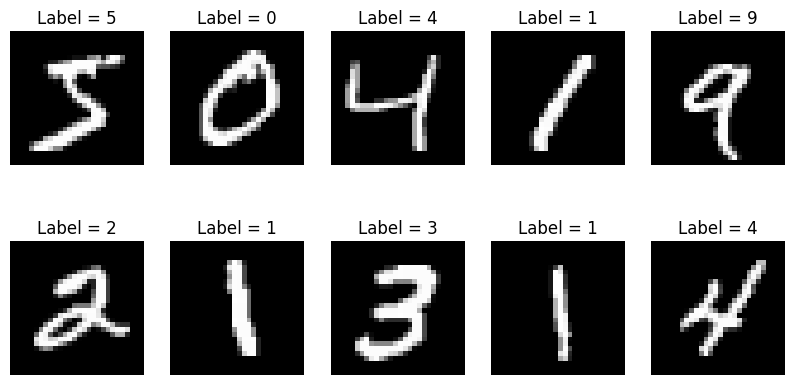

In [56]:

# create a figure with 10 subplots
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.ravel()

# loop over the first 10 images in the dataset
for i in range(10):
    # plot the image
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title("Label = {}".format(y_train[i]))
    axs[i].axis('off')

# show the plot
plt.show()

In [81]:
print("Are there GPUs Available: ",tf.test.is_gpu_available())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPUs Device Name: ",tf.test.gpu_device_name())
print("Is built with Cuda: ",tf.test.is_built_with_cuda())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Are there GPUs Available:  True
Num GPUs Available:  1
GPUs Device Name:  /device:GPU:0
Is built with Cuda:  True


In [88]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, 
                                activation='relu', 
                                input_shape=(784,), # 28x28 input pixels (to reshape accordingly)
                                kernel_initializer='glorot_uniform')) #uniform distribution weights initialization
model.add(tf.keras.layers.Dense(128))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 10 numbers output (to one-hot encode accordingly)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

early_stopping_monitor = EarlyStopping(monitor='loss', patience=3)

x_train_resh = x_train.reshape(-1, 784)
y_train_ohe = to_categorical(y_train, num_classes=10)


history = model.fit(x_train_resh,
                    y_train_ohe,
                    epochs=30,
                    batch_size = 28,
                    callbacks=[early_stopping_monitor])


Epoch 1/30
2143/2143 [==============================] - 11s 5ms/step - loss: 1.8193 - accuracy: 0.8562 - precision_19: 0.8751 - recall_19: 0.8427
Epoch 2/30
2143/2143 [==============================] - 11s 5ms/step - loss: 0.4964 - accuracy: 0.8935 - precision_19: 0.9361 - recall_19: 0.8651
Epoch 3/30
2143/2143 [==============================] - 11s 5ms/step - loss: 0.5168 - accuracy: 0.8930 - precision_19: 0.9562 - recall_19: 0.8538
Epoch 4/30
2143/2143 [==============================] - 11s 5ms/step - loss: 0.4678 - accuracy: 0.9023 - precision_19: 0.9630 - recall_19: 0.8685
Epoch 5/30
2143/2143 [==============================] - 11s 5ms/step - loss: 0.4092 - accuracy: 0.9109 - precision_19: 0.9662 - recall_19: 0.8800
Epoch 6/30
2143/2143 [==============================] - 11s 5ms/step - loss: 0.3438 - accuracy: 0.9247 - precision_19: 0.9691 - recall_19: 0.8982
Epoch 7/30
2143/2143 [==============================] - 11s 5ms/step - loss: 0.2855 - accuracy: 0.9341 - precision_19: 0.967

In [127]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units=16, 
                                activation='relu', 
                                input_shape=(784,), # 28x28 input pixels (to reshape accordingly)
                                kernel_initializer='glorot_uniform')) #uniform distribution weights initialization
model1.add(tf.keras.layers.Dense(100))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(10, activation='softmax')) # 10 numbers output (to one-hot encode accordingly)
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                12560     
                                                                 
 dense_24 (Dense)            (None, 100)               1700      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 15,270
Trainable params: 15,270
Non-trainable params: 0
_________________________________________________________________


In [128]:
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

early_stopping_monitor = EarlyStopping(monitor='accuracy', patience=3)

x_train_resh = x_train.reshape(-1, 784)
y_train_ohe = to_categorical(y_train, num_classes=10)


history = model1.fit(x_train_resh,
                    y_train_ohe,
                    epochs=70,
                    batch_size = 392,
                    callbacks=[early_stopping_monitor])

Epoch 1/70
154/154 [==============================] - 1s 5ms/step - loss: 3.9324 - accuracy: 0.1353 - precision_23: 0.4253 - recall_23: 0.0366
Epoch 2/70
154/154 [==============================] - 1s 5ms/step - loss: 2.0837 - accuracy: 0.1939 - precision_23: 0.9674 - recall_23: 0.0909
Epoch 3/70
154/154 [==============================] - 1s 5ms/step - loss: 2.0414 - accuracy: 0.1998 - precision_23: 0.9761 - recall_23: 0.1000
Epoch 4/70
154/154 [==============================] - 1s 5ms/step - loss: 2.0273 - accuracy: 0.2035 - precision_23: 0.9785 - recall_23: 0.1015
Epoch 5/70
154/154 [==============================] - 1s 5ms/step - loss: 2.0207 - accuracy: 0.2050 - precision_23: 0.9786 - recall_23: 0.1031
Epoch 6/70
154/154 [==============================] - 1s 5ms/step - loss: 2.0111 - accuracy: 0.2028 - precision_23: 0.9795 - recall_23: 0.1042
Epoch 7/70
154/154 [==============================] - 1s 5ms/step - loss: 2.0060 - accuracy: 0.2063 - precision_23: 0.9852 - recall_23: 0.1044

In [133]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=64, 
                                activation='relu', 
                                input_shape=(784,), # 28x28 input pixels (to reshape accordingly)
                                kernel_initializer='glorot_uniform')) #uniform distribution weights initialization
model2.add(tf.keras.layers.Dense(80))
model2.add(tf.keras.layers.Dense(20))
model2.add(tf.keras.layers.Dropout(0.1))
model2.add(tf.keras.layers.Dense(10, activation='softmax')) # 10 numbers output (to one-hot encode accordingly)
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 80)                5200      
                                                                 
 dense_28 (Dense)            (None, 20)                1620      
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                210       
                                                                 
Total params: 57,270
Trainable params: 57,270
Non-trainable params: 0
_________________________________________________________________


In [134]:
model2.compile(loss='categorical_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

early_stopping_monitor = EarlyStopping(monitor='accuracy', patience=3)

x_train_resh = x_train.reshape(-1, 784)
y_train_ohe = to_categorical(y_train, num_classes=10)


history = model2.fit(x_train_resh,
                    y_train_ohe,
                    epochs=50,
                    batch_size = 196,
                    callbacks=[early_stopping_monitor])

Epoch 1/50
307/307 [==============================] - 2s 5ms/step - loss: 4.0753 - accuracy: 0.3341 - precision_26: 0.8725 - recall_26: 0.2331
Epoch 2/50
307/307 [==============================] - 2s 5ms/step - loss: 1.3517 - accuracy: 0.5009 - precision_26: 0.9507 - recall_26: 0.3974
Epoch 3/50
307/307 [==============================] - 2s 5ms/step - loss: 1.1961 - accuracy: 0.5624 - precision_26: 0.9394 - recall_26: 0.4521
Epoch 4/50
307/307 [==============================] - 2s 5ms/step - loss: 1.1396 - accuracy: 0.5998 - precision_26: 0.9288 - recall_26: 0.4873
Epoch 5/50
307/307 [==============================] - 2s 5ms/step - loss: 0.8776 - accuracy: 0.7133 - precision_26: 0.9060 - recall_26: 0.5982
Epoch 6/50
307/307 [==============================] - 2s 5ms/step - loss: 0.6817 - accuracy: 0.8122 - precision_26: 0.8798 - recall_26: 0.7346
Epoch 7/50
307/307 [==============================] - 2s 5ms/step - loss: 0.5410 - accuracy: 0.8637 - precision_26: 0.8867 - recall_26: 0.8431

In [135]:
# correct = tf.equal(y_pred, y_test)
# accuracy = tf.reduce_mean(tf.cast(correct, 'float'))

y_pred_perc = model(x_test.reshape(-1,784))
y_pred = tf.argmax(y_pred_perc, axis = 1)
test_acc = np.mean(y_pred==y_test)
test_acc

0.951

In [136]:
y_pred_perc1 = model1(x_test.reshape(-1,784))
y_pred1 = tf.argmax(y_pred_perc1, axis = 1)
test_acc1 = np.mean(y_pred1==y_test)
test_acc1

0.8601

In [137]:
y_pred_perc2 = model2(x_test.reshape(-1,784))
y_pred2 = tf.argmax(y_pred_perc2, axis = 1)
test_acc2 = np.mean(y_pred2==y_test)
test_acc2

0.932